# Part 2

- Analyse de l'indice de Gini
- Création de nouvelles features (salaire moyen, salaire en pourcentage)
- Distribution des classes pour 8 pays choisis
- Courbes de Lorenz pour ces pays
- Evolution de l'indice de Gini pour ces pays (source Banque Mondiale)

## Import librairies

In [1]:
import pickle

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from descstats import Univa, MyPlot

pd.set_option('display.max_rows', None, 'display.max_columns', None)

Repository de mon module DescStats : https://github.com/nicodesh/DescStats

## Import data

In [2]:
with open("data/main_df.pkl", "rb") as f:
    my_unpickler = pickle.Unpickler(f)
    main_df = my_unpickler.load()
    
with open("data/overview.pkl", "rb") as f:
    my_unpickler = pickle.Unpickler(f)
    overview = my_unpickler.load()

In [3]:
display(main_df.head())
display(overview.head())

,country,year,quantile,nb_quantiles,income,gdpppp,country_full,population,gini
0,ALB,2008,1,100,728.89795,7297.0,Albanie,2991651,0.32141
1,ALB,2008,2,100,916.66235,7297.0,Albanie,2991651,0.32141
2,ALB,2008,3,100,1010.91600,7297.0,Albanie,2991651,0.32141
3,ALB,2008,4,100,1086.90780,7297.0,Albanie,2991651,0.32141
4,ALB,2008,5,100,1132.69970,7297.0,Albanie,2991651,0.32141


,fao_pop,data_pop,ratio_pop,fao_countries,data_countries,ratio_countries
year,,,,,,
2004,7805114732,17806638,0.00,230,1,0.00
2005,7893696048,0,0.00,230,0,0.00
2006,7983136151,288080792,0.04,231,5,0.02
2007,8073454300,2738504044,0.34,231,15,0.06
2008,8164569643,2327694781,0.29,231,75,0.32


## Create new features

income_total => The total income (in $PPP) for the country

income_ratio => income / income_total. It will be useful to plot and compare classes distribution between different countries

In [4]:
income_total = (
    main_df[['country', 'year', 'income']]
        .groupby(['country', 'year'])
        .sum()
        .reset_index()
)
income_total.rename(columns={'income':'income_total'}, inplace=True)

main_df = main_df.merge(income_total, how='left', on=['country', 'year'])
main_df['income_ratio'] = main_df.income / main_df.income_total

main_df.head()

,country,year,quantile,nb_quantiles,income,gdpppp,country_full,population,gini,income_total,income_ratio
0,ALB,2008,1,100,728.89795,7297.0,Albanie,2991651,0.32141,299482.9902,0.002434
1,ALB,2008,2,100,916.66235,7297.0,Albanie,2991651,0.32141,299482.9902,0.003061
2,ALB,2008,3,100,1010.91600,7297.0,Albanie,2991651,0.32141,299482.9902,0.003376
3,ALB,2008,4,100,1086.90780,7297.0,Albanie,2991651,0.32141,299482.9902,0.003629
4,ALB,2008,5,100,1132.69970,7297.0,Albanie,2991651,0.32141,299482.9902,0.003782


## Gini index

#### Worst and best countries + mean

In [5]:
print("Worst Gini countries")
display(main_df.sort_values(by='gini', ascending=False)[['country_full', 'country', 'gini']].drop_duplicates().head())

print("Best Gini countries")
display(main_df.sort_values(by='gini', ascending=True)[['country_full', 'country', 'gini']].drop_duplicates().head())

# Mean
print(f"Gini (mean): {main_df[['country', 'gini']].drop_duplicates().mean().iloc[0]:.3f}")

Worst Gini countries


,country_full,country,gini
11297,Afrique du Sud,ZAF,0.682949
4099,Honduras,HND,0.615512
2002,Colombie,COL,0.583437
3967,Guatemala,GTM,0.582468
1463,République centrafricaine,CAF,0.575972


Best Gini countries


,country_full,country,gini
9499,Slovénie,SVN,0.248249
9429,Slovaquie,SVK,0.264573
2300,Tchéquie (la),CZE,0.270162
9600,Suède,SWE,0.272166
10697,Ukraine,UKR,0.272415


Gini (mean): 0.396


#### What about France?

In [6]:
tempdf = main_df[['country', 'gini']].drop_duplicates().sort_values(by='gini').reset_index(drop=True)
nb_countries = len(tempdf)

ind = tempdf.query("country == 'FRA'")['gini'].iloc[0]
pos_fra = tempdf.query("country == 'FRA'").index[0] + 1

print(f"Value: {ind}")
print(f"Position of France: {pos_fra}")
print(f"Total countries: {nb_countries}")

Value: 0.34563984035678896
Position of France: 39
Total countries: 114


#### Complete list

In [7]:
tempdf = main_df[['country', 'country_full', 'gini']].drop_duplicates().sort_values(by='gini', ascending=False).reset_index(drop=True)
display(tempdf)

,country,country_full,gini
0,ZAF,Afrique du Sud,0.682949
1,HND,Honduras,0.615512
2,COL,Colombie,0.583437
3,GTM,Guatemala,0.582468
4,CAF,République centrafricaine,0.575972
5,BOL,Bolivie (État plurinational de),0.575719
6,BRA,Brésil,0.558905
7,PAN,Panama,0.546452
8,CHL,Chili,0.546115
9,PRY,Paraguay,0.539729


## Classes distribution - Separate graphs

In [8]:
countries = ['ZAF','BRA', 'CHN', 'USA', 'CAN', 'FRA', 'NLD', 'SWE']
colors = ['#e74c3c','#e74c3c','#e74c3c','#e74c3c','#3498db','#3498db','#3498db','#3498db']

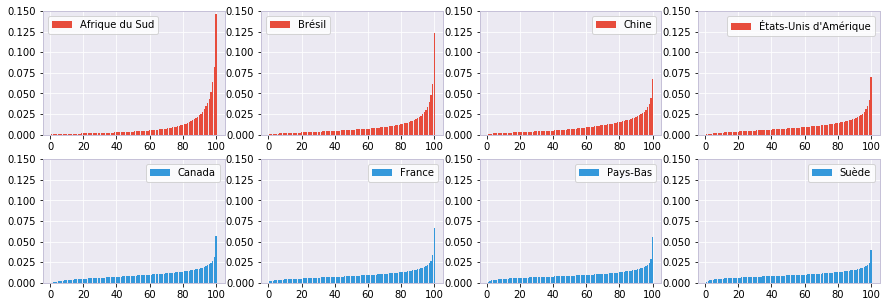

In [9]:
fig = plt.figure(figsize=(15,5))
                 
for i,x in enumerate(countries):
    data = main_df[main_df.country == x]
    the_country = data['country_full'].iloc[0]
    ax = plt.subplot(2,4,i+1)
    MyPlot.bg(ax)
    MyPlot.border(ax)
    plt.bar(data['quantile'], data['income_ratio'], label=the_country, zorder=2, color=colors[i])
    plt.legend()
    plt.ylim(0,0.15)

plt.show()

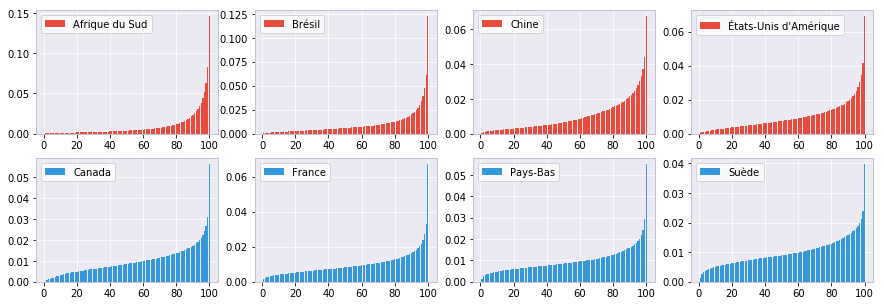

In [10]:
fig = plt.figure(figsize=(15,5))
                 
for i,x in enumerate(countries):
    data = main_df[main_df.country == x]
    the_country = data['country_full'].iloc[0]
    ax = plt.subplot(2,4,i+1)
    MyPlot.bg(ax)
    MyPlot.border(ax)
    plt.bar(data['quantile'], data['income_ratio'], label=the_country, zorder=2, color=colors[i])
    plt.legend()

plt.show()

In the worst countries, the richest percentile represents 15% of the country wealth.

## Classes distribution - Stacked graph

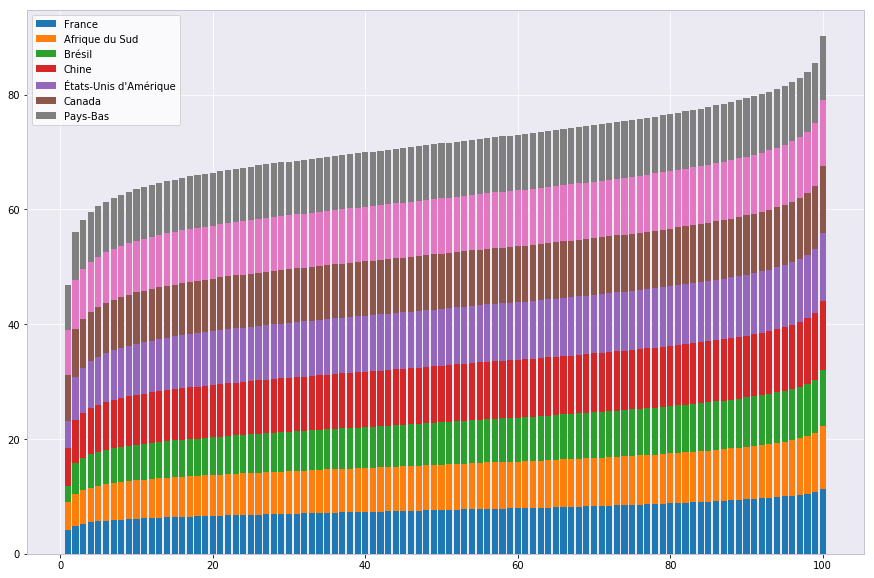

In [19]:
fig, ax = plt.subplots(figsize=(15,10))

# Create a first bottom at zero
bottom = pd.Series(np.zeros(100))

for i, x in enumerate(countries):
    
    # Get the country for label
    the_country = data['country_full'].iloc[0]
    
    # Select the data to plot
    data = main_df[main_df.country == countries[i]]
    
    # Plot the data with the cumulated bottom
    plt.bar(data['quantile'], np.log(data['income']), bottom=bottom, zorder=2, label=the_country)
    
    # Compute the new bottom
    bottom = bottom + np.log(data['income']).reset_index(drop=True)

#ax.set_yscale('log')
MyPlot.bg(ax)
MyPlot.border(ax)
plt.legend()
plt.show()

## Lorenz Curve

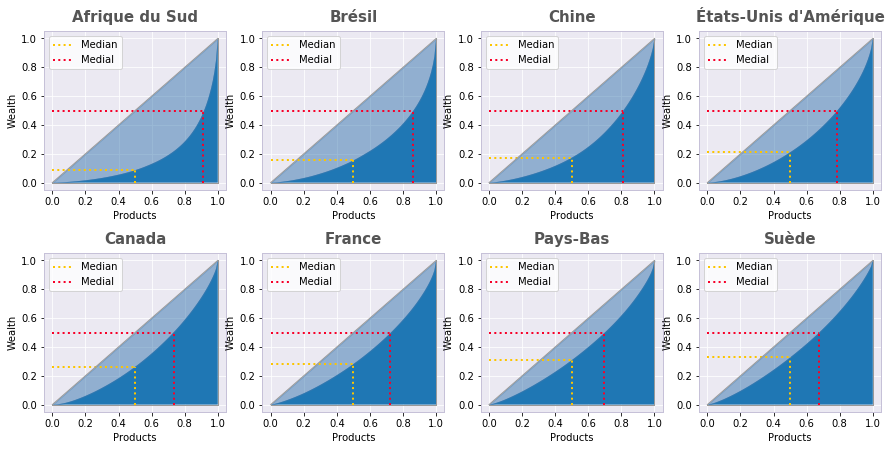

In [12]:
fig = plt.figure(figsize=(15,7))

for i,x in enumerate(countries):
    ax = plt.subplot(2,4,i+1)
    
    data = main_df[main_df.country == x]
    the_country = data['country_full'].iloc[0]
    
    univ = Univa(data['income'])
    univ.lorenz(title=the_country, ax=ax)

plt.gcf().subplots_adjust(hspace=0.4)
plt.show()

## Gini evolution by country

Data source: https://donnees.banquemondiale.org/indicateur/si.pov.gini?view=map

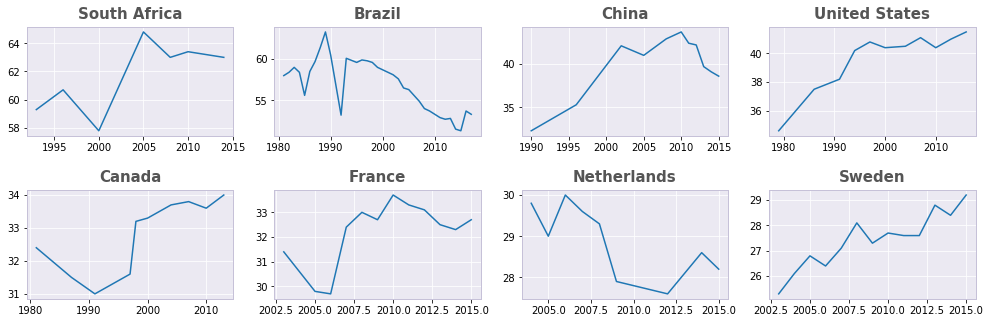

In [13]:
df = pd.read_csv("data/gini.txt")
fig = plt.figure(figsize=(17,5))

for i,x in enumerate(countries):
    
    country = df[df['Country Code'] == x]['Country Name'].iloc[0]
    
    tempdf = (
        df[df['Country Code'] == x]
            .dropna(axis=1)
            .drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], axis=1)
    )
    
    years = pd.Series(tempdf.columns.to_list()).astype(int)
    ginis = pd.Series(tempdf.iloc[0].to_list())
    
    ax = plt.subplot(2,4,i+1)
    plt.plot(years, ginis)
    MyPlot.title(ax, country)
    MyPlot.bg(ax)
    MyPlot.border(ax)

plt.gcf().subplots_adjust(hspace=0.5)
plt.show()

## Average income by country

In [14]:
income_df = main_df[['country','income']].groupby('country').mean().reset_index()
income_df.rename(columns={'income':'income_avg'}, inplace=True)

main_df = main_df.merge(income_df, how='left', on='country').copy()

main_df.head()

,country,year,quantile,nb_quantiles,income,gdpppp,country_full,population,gini,income_total,income_ratio,income_avg
0,ALB,2008,1,100,728.89795,7297.0,Albanie,2991651,0.32141,299482.9902,0.002434,2994.829902
1,ALB,2008,2,100,916.66235,7297.0,Albanie,2991651,0.32141,299482.9902,0.003061,2994.829902
2,ALB,2008,3,100,1010.91600,7297.0,Albanie,2991651,0.32141,299482.9902,0.003376,2994.829902
3,ALB,2008,4,100,1086.90780,7297.0,Albanie,2991651,0.32141,299482.9902,0.003629,2994.829902
4,ALB,2008,5,100,1132.69970,7297.0,Albanie,2991651,0.32141,299482.9902,0.003782,2994.829902


## Save data

In [15]:
with open("data/main_df.pkl", "wb") as f:
    my_pickle = pickle.Pickler(f)
    my_pickle.dump(main_df)
    
with open("data/overview.pkl", "wb") as f:
    my_pickle = pickle.Pickler(f)
    my_pickle.dump(overview)